# RBF Test Cases

In [1]:
from rbf import *
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

## Classification

### Linear Simple

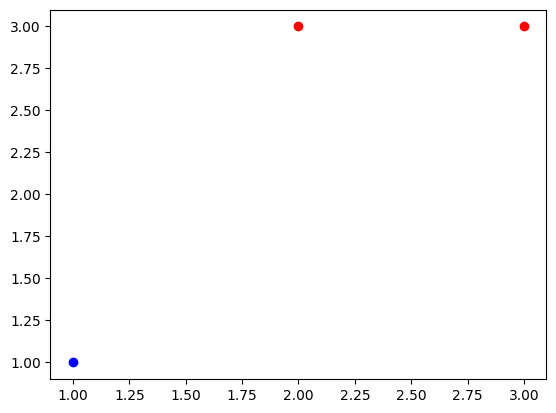

<Figure size 640x480 with 0 Axes>

In [2]:
    training_dataset = np.array([
    [1.0, 1.0],
    [2.0, 3.0],
    [3.0, 3.0]
])
labels = np.array([
    [1.0],
    [-1.0],
    [-1.0]
])

plt.scatter(training_dataset[0, 0], training_dataset[0, 1], color='blue')
plt.scatter(training_dataset[1:3, 0], training_dataset[1:3, 1], color='red')
plt.show()
plt.clf()

In [3]:
hidden_layer_neurons_count: int = len(training_dataset)
neurons_per_layer: list[int] = [2, hidden_layer_neurons_count, 1]
activation: str = "sign"
model: RBF = RBF(
    neurons_per_layer,
    activation,
    training_dataset,
    labels
)

In [4]:
gamma: float = 0.1
max_iterations: int = 1
model.fit(gamma, max_iterations)

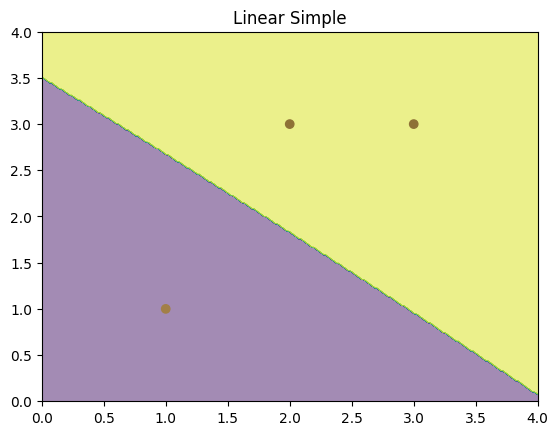

<Figure size 640x480 with 0 Axes>

In [5]:
plt.scatter([p[0] for p in training_dataset], [p[1] for p in training_dataset], c=[l[0] for l in labels])
x = np.linspace(0, 4, 300)
y = np.linspace(0, 4, 300)
X, Y = np.meshgrid(x, y)
Z = np.array([[1 if model.predict([x, y])[0]>0 else -1 for x in x] for y in y])
plt.contourf(X, Y, Z, alpha=0.5)
plt.title('Linear Simple')
plt.show()
plt.clf()

### Linear Multiple

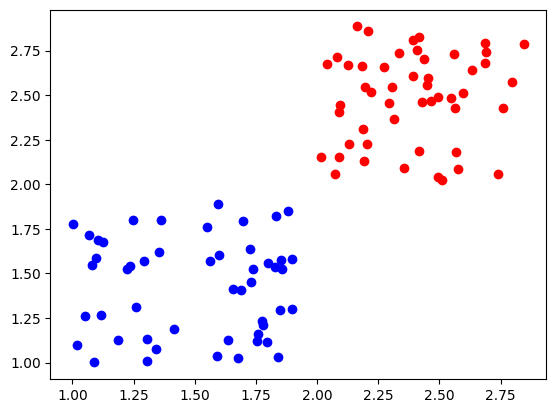

<Figure size 640x480 with 0 Axes>

In [6]:
training_dataset = np.concatenate([
    np.random.random((50, 2)) * 0.9 + np.array([1, 1]),
    np.random.random((50, 2)) * 0.9 + np.array([2, 2])
])
labels = np.concatenate(
    [np.ones((50, 1)), np.ones((50, 1)) * -1.0]
)

plt.scatter(training_dataset[0:50, 0], training_dataset[0:50, 1], color='blue')
plt.scatter(training_dataset[50:100, 0], training_dataset[50:100, 1], color='red')
plt.show()
plt.clf()

In [7]:
hidden_layer_neurons_count: int = 10
neurons_per_layer: list[int] = [2, hidden_layer_neurons_count, 1]
activation: str = "sign"
model: RBF = RBF(
    neurons_per_layer,
    activation,
    training_dataset,
    labels
)

In [8]:
gamma: float = 0.01
max_iterations: int = 100
model.fit(gamma, max_iterations)

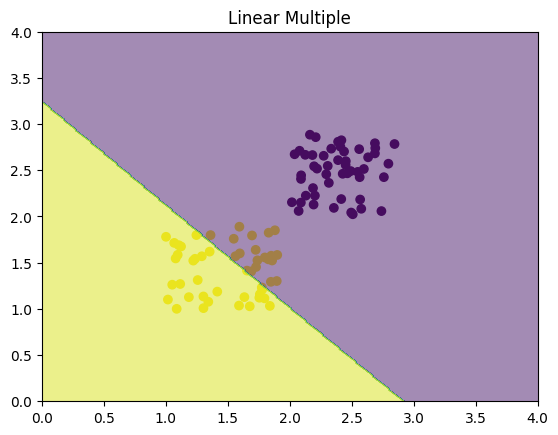

<Figure size 640x480 with 0 Axes>

In [9]:
plt.scatter([p[0] for p in training_dataset], [p[1] for p in training_dataset], c=[l[0] for l in labels])
x = np.linspace(0, 4, 300)
y = np.linspace(0, 4, 300)
X, Y = np.meshgrid(x, y)
Z = np.array([[1 if model.predict([x, y])[0]>0 else -1 for x in x] for y in y])
plt.contourf(X, Y, Z, alpha=0.5)
plt.title('Linear Multiple')
plt.show()
plt.clf()

### XOR

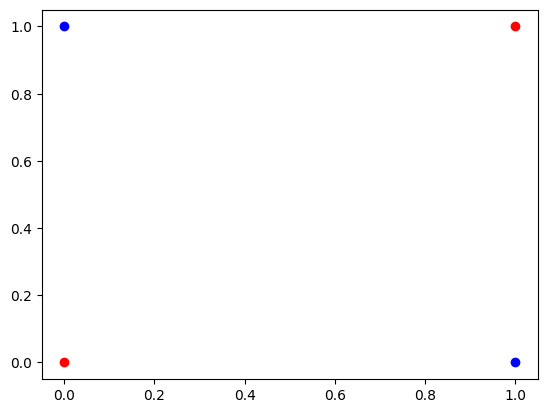

<Figure size 640x480 with 0 Axes>

In [10]:
training_dataset = np.array([[1.0, 0.0], [0.0, 1.0], [0.0, 0.0], [1.0, 1.0]])
labels = np.array([[1.0], [1.0], [-1.0], [-1.0]])

plt.scatter(training_dataset[0:2, 0], training_dataset[0:2, 1], color='blue')
plt.scatter(training_dataset[2:4, 0], training_dataset[2:4, 1], color='red')
plt.show()
plt.clf()

In [11]:
hidden_layer_neurons_count: int = len(training_dataset)
neurons_per_layer: list[int] = [2, hidden_layer_neurons_count, 1]
activation: str = "sign"
model: RBF = RBF(
    neurons_per_layer,
    activation,
    training_dataset,
    labels
)

In [12]:
gamma: float = 0.1
max_iterations: int = 1
model.fit(gamma, max_iterations)

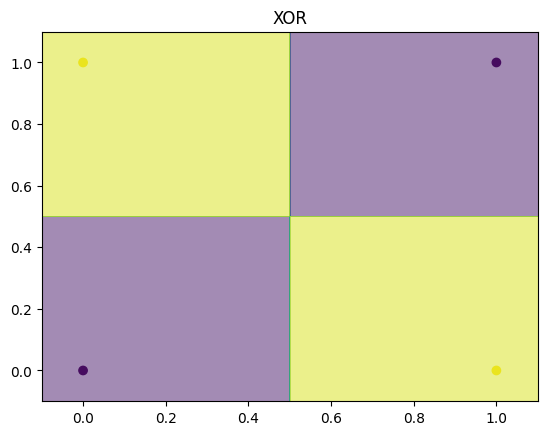

<Figure size 640x480 with 0 Axes>

In [13]:
plt.scatter([p[0] for p in training_dataset], [p[1] for p in training_dataset], c=[l[0] for l in labels])
x = np.linspace(-0.1, 1.1, 300)
y = np.linspace(-0.1, 1.1, 300)
X, Y = np.meshgrid(x, y)
Z = np.array([[1 if model.predict([x, y])[0]>0 else -1 for x in x] for y in y])
plt.contourf(X, Y, Z, alpha=0.5)
plt.title('XOR')
plt.show()
plt.clf()

### Cross

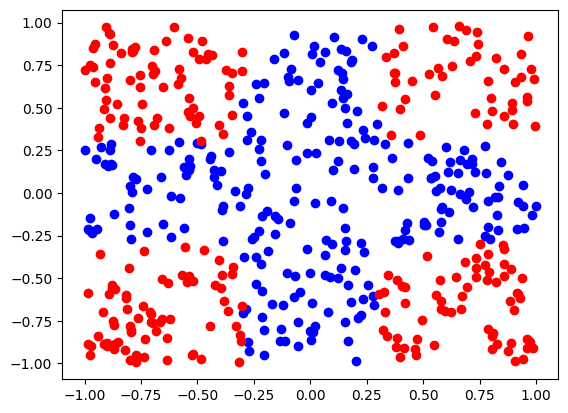

<Figure size 640x480 with 0 Axes>

In [14]:
training_dataset = np.random.random((500, 2)) * 2.0 - 1.0
labels = np.array([
    [1.0] if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else [-1.0]
    for p in training_dataset
])

plt.scatter(
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]] == 1.0, enumerate(training_dataset))
    )))[:, 0], 
    np.array(list(map(
        lambda elt: elt[1], 
        filter(lambda c: labels[c[0]] == 1.0, enumerate(training_dataset))
    )))[:, 1],
    color='blue'
)
plt.scatter(
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]] == -1.0, enumerate(training_dataset))
    )))[:, 0],
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]] == -1.0, enumerate(training_dataset))
    )))[:, 1],
    color='red'
)
plt.show()
plt.clf()

In [15]:
hidden_layer_neurons_count: int = round(len(training_dataset) / 7)
neurons_per_layer: list[int] = [2, hidden_layer_neurons_count, 1]
activation: str = "sign"
model: RBF = RBF(
    neurons_per_layer,
    activation,
    training_dataset,
    labels
)

In [16]:
gamma: float = 0.01
max_iterations: int = 10
model.fit(gamma, max_iterations)

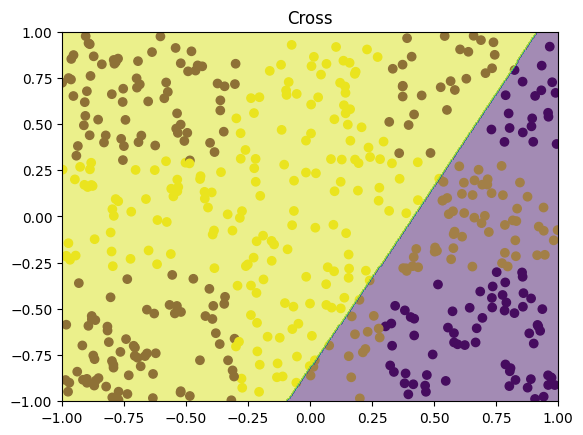

<Figure size 640x480 with 0 Axes>

In [17]:
plt.scatter([p[0] for p in training_dataset], [p[1] for p in training_dataset], c=[l[0] for l in labels])
x = np.linspace(-1, 1, 300)
y = np.linspace(-1, 1, 300)
X, Y = np.meshgrid(x, y)
Z = np.array([[1 if model.predict([x, y])[0]>0 else -1 for x in x] for y in y])
plt.contourf(X, Y, Z, alpha=0.5)
plt.title('Cross')
plt.show()
plt.clf()

### Multi Linear 3 Classes

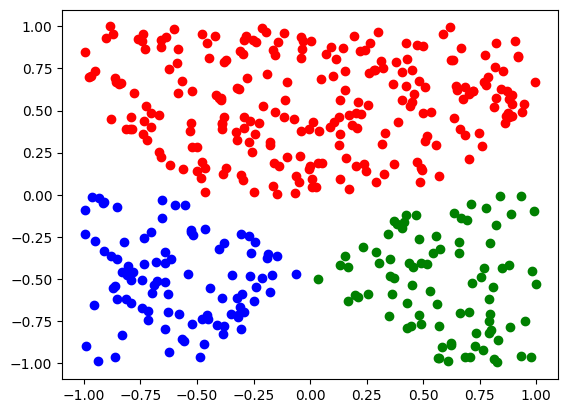

<Figure size 640x480 with 0 Axes>

In [18]:
training_dataset = np.random.random((500, 2)) * 2.0 - 1.0
labels = np.array([
    [1.0, 0.0, 0.0] if -p[0] - p[1] - 0.5 > 0 > p[1] and p[0] - p[1] - 0.5 < 0
    else [0.0, 1.0, 0.0] if -p[0] - p[1] - 0.5 < 0 < p[1] and p[0] - p[1] - 0.5 < 0
    else [0.0, 0.0, 1.0] if -p[0] - p[1] - 0.5 < 0 < p[0] - p[1] - 0.5 and p[1] < 0
    else [0.0, 0.0, 0.0] for p in training_dataset
])
training_dataset = training_dataset[[not np.all(arr == [0, 0, 0]) for arr in labels]]
labels = labels[[not np.all(arr == [0, 0, 0]) for arr in labels]]

plt.scatter(
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][0] == 1, enumerate(training_dataset))
    )))[:, 0],
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][0] == 1, enumerate(training_dataset))
    )))[:, 1], 
    color='blue'
)
plt.scatter(
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][1] == 1, enumerate(training_dataset))
    )))[:, 0],
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][1] == 1, enumerate(training_dataset))
    )))[:, 1],
    color='red'
)
plt.scatter(
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][2] == 1, enumerate(training_dataset))
    )))[:, 0],
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][2] == 1, enumerate(training_dataset))
    )))[:, 1],
    color='green'
)
plt.show()
plt.clf()

In [19]:
hidden_layer_neurons_count: int = round(len(training_dataset) / 4)
neurons_per_layer: list[int] = [2, hidden_layer_neurons_count, 3]
activation: str = "logistic"
model: RBF = RBF(
    neurons_per_layer,
    activation,
    training_dataset,
    labels
)

In [20]:
gamma: float = 0.1
max_iterations: int = 100
model.fit(gamma, max_iterations)

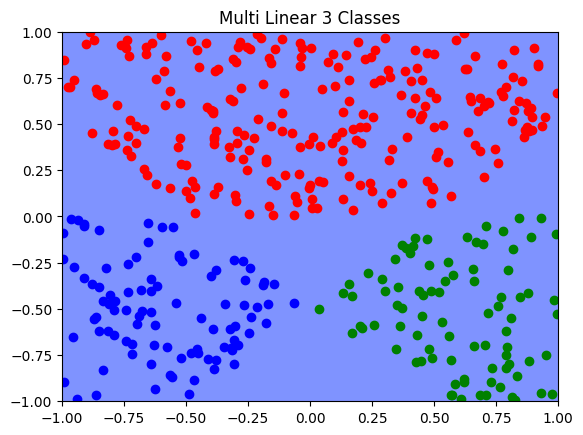

<Figure size 640x480 with 0 Axes>

In [21]:
x = np.linspace(-1, 1, 300)
y = np.linspace(-1, 1, 300)
X, Y = np.meshgrid(x, y)
Z = np.array([[np.argmax(model.predict([xx, yy])) for xx in x] for yy in y])
plt.contourf(X, Y, Z, alpha=0.5, levels=np.arange(4) - 0.5, cmap='jet')
plt.scatter(training_dataset[labels[:, 0] == 1][:, 0], training_dataset[labels[:, 0] == 1][:, 1], color='blue')
plt.scatter(training_dataset[labels[:, 1] == 1][:, 0], training_dataset[labels[:, 1] == 1][:, 1], color='red')
plt.scatter(training_dataset[labels[:, 2] == 1][:, 0], training_dataset[labels[:, 2] == 1][:, 1], color='green')
plt.title('Multi Linear 3 Classes')
plt.show()
plt.clf()

### Multi Cross

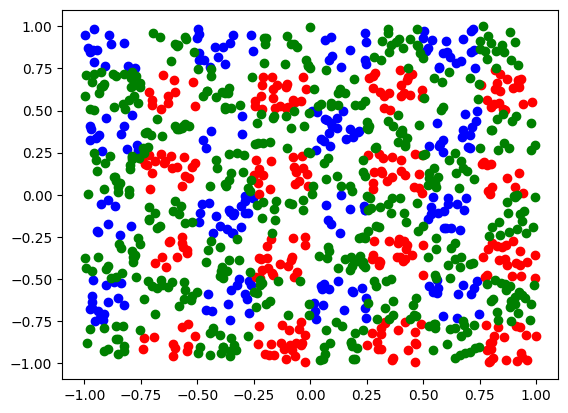

<Figure size 640x480 with 0 Axes>

In [22]:
training_dataset = np.random.random((1000, 2)) * 2.0 - 1.0
labels = np.array([
    [1.0, 0.0, 0.0] if abs(p[0] % 0.5) <= 0.25 < abs(p[1] % 0.5)
    else [0.0, 1.0, 0.0] if abs(p[0] % 0.5) > 0.25 >= abs(p[1] % 0.5)
    else [0.0, 0.0, 1.0]
    for p in training_dataset
])

plt.scatter(
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][0] == 1, enumerate(training_dataset))
    )))[:, 0],
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][0] == 1, enumerate(training_dataset))
    )))[:, 1],
    color='blue'
)
plt.scatter(
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][1] == 1, enumerate(training_dataset))
    )))[:, 0],
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][1] == 1, enumerate(training_dataset))
    )))[:, 1],
    color='red'
)
plt.scatter(
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][2] == 1, enumerate(training_dataset))
    )))[:, 0],
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][2] == 1, enumerate(training_dataset))
    )))[:, 1],
    color='green'
)
plt.show()
plt.clf()

In [23]:
hidden_layer_neurons_count: int = round(len(training_dataset) / 10)
neurons_per_layer: list[int] = [2, hidden_layer_neurons_count, 3]
activation: str = "logistic"
model: RBF = RBF(
    neurons_per_layer,
    activation,
    training_dataset,
    labels
)

In [24]:
gamma: float = 0.1
max_iterations: int = 1000
model.fit(gamma, max_iterations)

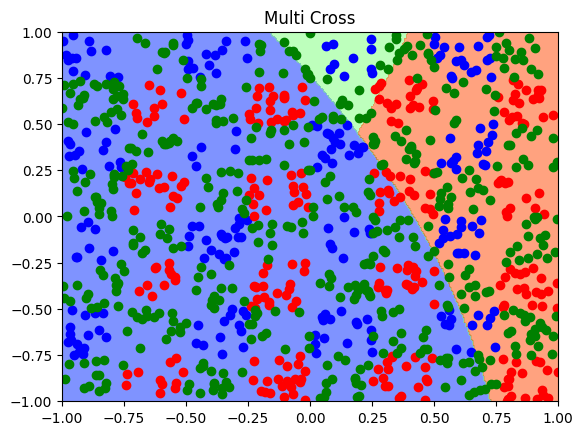

<Figure size 640x480 with 0 Axes>

In [25]:
x = np.linspace(-1, 1, 300)
y = np.linspace(-1, 1, 300)
X, Y = np.meshgrid(x, y)
Z = np.array([[np.argmax(model.predict([xx, yy])) for xx in x] for yy in y])
plt.contourf(X, Y, Z, alpha=0.5, levels=np.arange(4) - 0.5, cmap='jet')
plt.scatter(training_dataset[labels[:, 0] == 1][:, 0], training_dataset[labels[:, 0] == 1][:, 1], color='blue')
plt.scatter(training_dataset[labels[:, 1] == 1][:, 0], training_dataset[labels[:, 1] == 1][:, 1], color='red')
plt.scatter(training_dataset[labels[:, 2] == 1][:, 0], training_dataset[labels[:, 2] == 1][:, 1], color='green')
plt.title('Multi Cross')
plt.show()
plt.clf()

## Regression

### Linear Simple 2D

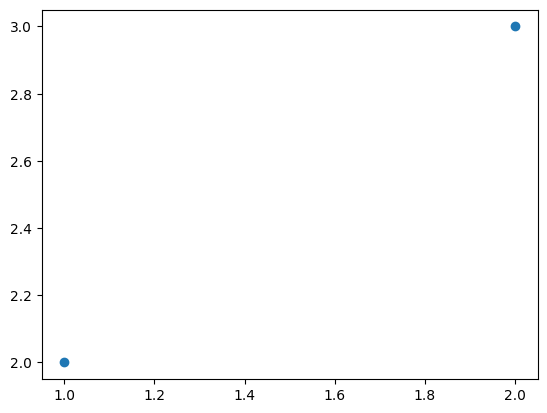

<Figure size 640x480 with 0 Axes>

In [26]:
training_dataset = np.array([[1.0], [2.0]])
labels = np.array([[2.0], [3.0]])

plt.scatter(training_dataset, labels)
plt.show()
plt.clf()

In [27]:
hidden_layer_neurons_count: int = len(training_dataset)
neurons_per_layer: list[int] = [2, hidden_layer_neurons_count, 1]
activation: str = "identity" 
model: RBF = RBF(
    neurons_per_layer,
    activation,
    training_dataset,
    labels
)

In [28]:
gamma: float = 0.1
max_iterations: int = 1
model.fit(gamma, max_iterations)

In [29]:
for i, input in enumerate(training_dataset):
    output: list[float] = model.predict(input)
    print(f"Expected: {labels[i]}, Predicted: {output}")

Expected: [2.], Predicted: [2.0000000000000053]
Expected: [3.], Predicted: [3.000000000000003]


### Non Linear Simple 2

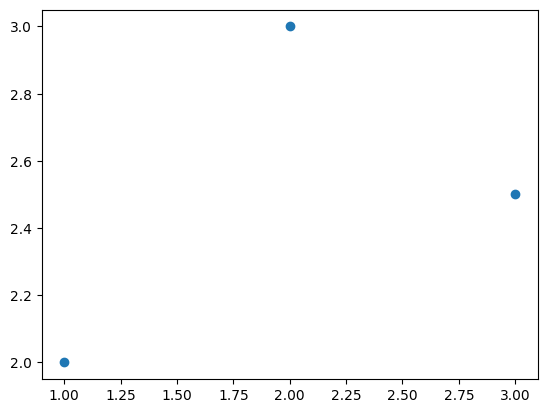

<Figure size 640x480 with 0 Axes>

In [30]:
training_dataset = np.array([[1.0], [2.0], [3.0]])
labels = np.array([[2.0], [3.0], [2.5]])

plt.scatter(training_dataset, labels)
plt.show()
plt.clf()

In [31]:
hidden_layer_neurons_count: int = len(training_dataset)
neurons_per_layer: list[int] = [2, hidden_layer_neurons_count, 1]
activation: str = "identity"
model: RBF = RBF(
    neurons_per_layer,
    activation,
    training_dataset,
    labels
)

In [32]:
gamma: float = 0.01
max_iterations: int = 10
model.fit(gamma, max_iterations)

In [33]:
for i, input in enumerate(training_dataset):
    output: list[float] = model.predict(input)
    print(f"Expected: {labels[i]}, Predicted: {output}")

Expected: [2.], Predicted: [2.4999644440458724]
Expected: [3.], Predicted: [2.9999664176982606]
Expected: [2.5], Predicted: [1.9999619836301008]


### Linear Simple 3D

In [34]:
training_dataset = np.array([[1.0, 1.0], [2.0, 2.0], [3.0, 1.0]])
labels = np.array([[2.0], [3.0], [2.5]])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(training_dataset[:, 0], training_dataset[:, 1], labels)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [35]:
hidden_layer_neurons_count: int = len(training_dataset)
neurons_per_layer: list[int] = [2, hidden_layer_neurons_count, 1]
activation: str = "identity"
model: RBF = RBF(
    neurons_per_layer,
    activation,
    training_dataset,
    labels
)

In [36]:
gamma: float = 0.01
max_iterations: int = 10
model.fit(gamma, max_iterations)

In [37]:
for i, input in enumerate(training_dataset):
    output: list[float] = model.predict(input)
    print(f"Expected: {labels[i]}, Predicted: {output}")

Expected: [2.], Predicted: [2.500000004376556]
Expected: [3.], Predicted: [3.0000000035025867]
Expected: [2.5], Predicted: [2.000000005250378]


### Linear Tricky 3D

In [38]:
training_dataset = np.array([[1.0, 1.0], [2.0, 2.0], [3.0, 3.0]])
Y = np.array([[1.0], [2.0], [3.0]])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(training_dataset[:, 0], training_dataset[:, 1], labels)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [39]:
hidden_layer_neurons_count: int = len(training_dataset)
neurons_per_layer: list[int] = [2, hidden_layer_neurons_count, 1]
activation: str = "identity"
model: RBF = RBF(
    neurons_per_layer,
    activation,
    training_dataset,
    labels
)

In [40]:
gamma: float = 0.1
max_iterations: int = 1
model.fit(gamma, max_iterations)

In [41]:
for i, input in enumerate(training_dataset):
    output: list[float] = model.predict(input)
    print(f"Expected: {labels[i]}, Predicted: {output}")

Expected: [2.], Predicted: [2.4999999999997327]
Expected: [3.], Predicted: [2.9999999999996847]
Expected: [2.5], Predicted: [1.9999999999997442]


### Non Linear Simple 3D

In [42]:
training_dataset = np.array([[1.0, 0.0], [0.0, 1.0], [1.0, 1.0], [0.0, 0.0]])
labels = np.array([[2.0], [1.0], [-2.0], [-1.0]])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(training_dataset[:, 0], training_dataset[:, 1], labels)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [43]:
hidden_layer_neurons_count: int = len(training_dataset)
neurons_per_layer: list[int] = [2, hidden_layer_neurons_count, 1]
activation: str = "identity"
model: RBF = RBF(
    neurons_per_layer,
    activation,
    training_dataset,
    labels
)

In [44]:
gamma: float = 0.1
max_iterations: int = 10
model.fit(gamma, max_iterations)

In [45]:
for i, input in enumerate(training_dataset):
    output: list[float] = model.predict(input)
    print(f"Expected: {labels[i]}, Predicted: {output}")

Expected: [2.], Predicted: [-29.524996886679617]
Expected: [1.], Predicted: [29.524996887533803]
Expected: [-2.], Predicted: [-30.52499692231666]
Expected: [-1.], Predicted: [30.524996923186677]
